In [1]:
suppressMessages({
    library(Seurat)
    library(SeuratWrappers)
    library(tidyverse)
    library(harmony)
    library(ggrepel)
    library(ggrastr)
    library(magrittr)
    # GO enrich use packages
    library(DOSE)
    library(clusterProfiler)
    library(org.Hs.eg.db)
    library(ggplot2)
    library(dplyr)
    library(topGO)
    library(GSEABase)
    library(stringr)
    library(RColorBrewer)
    ## RNA velocity
    library(velocyto.R)
})

In [2]:
suppressMessages(
    source("~/project/2020-6-18-IVDD_scRNA/scripts/R_scripts/preferable_scripts/common_use_functions.R")
)  

In [92]:
save.image("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/tmp_new_Fig4_immune.RData")

In [3]:
load("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/tmp_new_Fig4_immune.RData")

In [4]:
options(repr.plot.width=14, repr.plot.height=10)

# remove neural progenitor and re-plot

In [6]:
immune.seu <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/new_noC03_immune2_SeuratObj.Rds")

In [7]:
Idents(immune.seu) %>% unique()

[1] Transitional B              CSTA+ Monocyte             
 [3] CAMP+ Neutrophic            Plasmacytoid dendritic cell
 [5] EREG+ Monocyte              MZ B                       
 [7] CMTM2+ Neutrophic           Effector CD8+ T            
 [9] Plasma B                    GMP                        
[11] Memory CD8+ T               Naive CD8+ T               
[13] C1QA+ Macrophage            HAPLN1+ Progenitor         
[15] Neural Progenitor           Memory B                   
[17] HLA+ Monocyte               CCL3+ Macrophage           
[19] NR4A2+ Macrophage           MD DC                      
[21] IL1B+ Monocyte              Mast                       
[23] SPP1+ Macrophage           
23 Levels: Transitional B CSTA+ Monocyte ... SPP1+ Macrophage

In [9]:
immune.seu$new.immune.ct %>% unique()

[1] "Transitional B"              "CSTA+ Monocyte"             
 [3] "CAMP+ Neutrophic"            "Plasmacytoid dendritic cell"
 [5] "EREG+ Monocyte"              "MZ B"                       
 [7] "CMTM2+ Neutrophic"           "Effector CD8+ T"            
 [9] "Plasma B"                    "GMP"                        
[11] "Memory CD8+ T"               "Naive CD8+ T"               
[13] "C1QA+ Macrophage"            "HAPLN1+ Progenitor"         
[15] "Neural Progenitor"           "Memory B"                   
[17] "HLA+ Monocyte"               "CCL3+ Macrophage"           
[19] "NR4A2+ Macrophage"           "MD DC"                      
[21] "IL1B+ Monocyte"              "Mast"                       
[23] "SPP1+ Macrophage"

In [10]:
immune.seu <- subset(immune.seu, idents = unique(immune.seu$new.immune.ct)[!(unique(immune.seu$new.immune.ct) %in% c("Neural Progenitor"))] )

In [5]:
Idents(immune.seu) %>% unique()

[1] Transitional B              CSTA+ Monocyte             
 [3] CAMP+ Neutrophic            Plasmacytoid dendritic cell
 [5] EREG+ Monocyte              MZ B                       
 [7] CMTM2+ Neutrophic           Effector CD8+ T            
 [9] Plasma B                    GMP                        
[11] Memory CD8+ T               Naive CD8+ T               
[13] C1QA+ Macrophage            HAPLN1+ Progenitor         
[15] Memory B                    HLA+ Monocyte              
[17] CCL3+ Macrophage            NR4A2+ Macrophage          
[19] MD DC                       IL1B+ Monocyte             
[21] Mast                        SPP1+ Macrophage           
22 Levels: Transitional B CSTA+ Monocyte ... SPP1+ Macrophage

In [6]:
unique(immune.seu$new.immune.ct.gen)

[1] "B cell"                      "Monocyte/Macrophage"        
[3] "Neutrophic"                  "Plasmacytoid dendritic cell"
[5] "CD8 T"                       "Mast"

In [7]:
Idents(immune.seu) <- immune.seu$new.immune.ct.gen

In [138]:
immune.seu.MAST.markers <- FindAllMarkers(immune.seu, min.pct = 0.2, only.pos = TRUE, test.use="MAST")

Calculating cluster B cell


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster Monocyte/Macrophage


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster Neutrophic


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster Plasmacytoid dendritic cell


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster CD8 T


Done!

Combining coefficients and standard errors

Calculating log-fold changes

Calculating likelihood ratio tests

Refitting on reduced model...


Done!

Calculating cluster Mast


Done!

Comb

In [140]:
write.csv(immune.seu.MAST.markers, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/immune_gen_markers.csv",
         quote = F, row.names=F)

In [15]:
immune.seu.MAST.markers <- read.csv("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/immune_gen_markers.csv")

In [19]:
new_M1 <- c("KYNU", "IDO1", "CD40", "CCR7", "GBP1", "CXCL11", "CXCL10", "CXCL9", "CCL5",
            "IL23R", "IL12B", "IL12A", "IL1B", "IL6", "TNF", "PTX3", "MMP9", "CXCL8", "IL1B",
            "IL6") %>% unique()

new_M2 <- c("ADOR3", "TGFBR2", "F13A1", "STAB1", "CD163", "MARCO", "IL17RB", "ALOX5AP", "ALOX5AP",
            "IL4R", "IL10", "CD200R1", "ALOX15", "TGM2", "MRC1", "CCL17", "CCL13", "CCL4", "TG",
            "MMP12", "MMP1", "TGFB1", "FN1", "F13A1", "CCL18") %>% unique()

In [18]:
mo.df <- filter(immune.seu.MAST.markers, cluster == "Monocyte/Macrophage")

In [22]:
mo.df$gene[mo.df$gene %in% new_M2] -> test

In [24]:
Idents(immune.seu) <- immune.seu$new.immune.ct.gen

In [ ]:
immune.seu <- Seurat.wf(immune.seu)

immune.seu <-
  RunHarmony(
    immune.seu,
    group.by.vars = "sample_name"
  )

npcs = 70
resolution = 3
immune.seu <- 
  immune.seu %>% 
    RunUMAP(reduction = "harmony", dims = 1:npcs) %>% 
    FindNeighbors(reduction = "harmony", dims = 1:npcs) %>% 
    FindClusters(resolution = resolution) %>% 
    identity()

In [28]:
immune.seu$new.immune.ct %>% unique()

[1] "Transitional B"              "CSTA+ Monocyte"             
 [3] "CAMP+ Neutrophic"            "Plasmacytoid dendritic cell"
 [5] "EREG+ Monocyte"              "MZ B"                       
 [7] "CMTM2+ Neutrophic"           "Effector CD8+ T"            
 [9] "Plasma B"                    "GMP"                        
[11] "Memory CD8+ T"               "Naive CD8+ T"               
[13] "C1QA+ Macrophage"            "HAPLN1+ Progenitor"         
[15] "Memory B"                    "HLA+ Monocyte"              
[17] "CCL3+ Macrophage"            "NR4A2+ Macrophage"          
[19] "MD DC"                       "IL1B+ Monocyte"             
[21] "Mast"                        "SPP1+ Macrophage"

In [41]:
immune.seu$new.immune.ct1 <- 
    plyr::mapvalues(immune.seu$new.immune.ct, 
                    from = unique(monocyte.seu$new.immune.ct), 
                    to = c("Mono-CSTA", "Mphi-ERGE", "Mphi-C1QA", "Mono-HLA", "Mphi-CCL3", "Mphi-NR4A2", "Mono-CTSK", "Mphi-IL1B", "Mphi-SPP1"))

In [42]:
immune.seu$new.immune.ct2 <- 
    plyr::mapvalues(immune.seu$new.immune.ct, 
                    from = unique(monocyte.seu$new.immune.ct), 
                    to = c("Mono-CSTA", "Mphi-M1-ERGE", "Mphi-M2-C1QA", "Mono-HLA", "Mphi-M1-CCL3", "Mphi-M2-NR4A2", "Mono-CTSK", "Mphi-M1-IL1B", "Mphi-M2-SPP1"))

[1] "C1QA+ Macrophage"            "CAMP+ Neutrophic"           
 [3] "CCL3+ Macrophage"            "CMTM2+ Neutrophic"          
 [5] "CSTA+ Monocyte"              "Effector CD8+ T"            
 [7] "EREG+ Monocyte"              "GMP"                        
 [9] "HAPLN1+ Progenitor"          "HLA+ Monocyte"              
[11] "IL1B+ Monocyte"              "Mast"                       
[13] "MD DC"                       "Memory B"                   
[15] "Memory CD8+ T"               "MZ B"                       
[17] "Naive CD8+ T"                "NR4A2+ Macrophage"          
[19] "Plasma B"                    "Plasmacytoid dendritic cell"
[21] "SPP1+ Macrophage"            "Transitional B"

In [11]:
Idents(immune.seu) <- immune.seu$new.immune.ct2

In [12]:
levels(Idents(immune.seu))

[1] "Transitional B"              "Mono-CSTA"                  
 [3] "CAMP+ Neutrophic"            "Plasmacytoid dendritic cell"
 [5] "Mphi-M1-ERGE"                "MZ B"                       
 [7] "CMTM2+ Neutrophic"           "Effector CD8+ T"            
 [9] "Plasma B"                    "GMP"                        
[11] "Memory CD8+ T"               "Naive CD8+ T"               
[13] "Mphi-M2-C1QA"                "HAPLN1+ Progenitor"         
[15] "Memory B"                    "Mono-HLA"                   
[17] "Mphi-M1-CCL3"                "Mphi-M2-NR4A2"              
[19] "Mono-CTSK"                   "Mphi-M1-IL1B"               
[21] "Mast"                        "Mphi-M2-SPP1"

In [7]:
Idents(immune.seu) <- immune.seu$new.immune.ct.gen

## UMAP plots

In [56]:
mycolors <- colorRampPalette(brewer.pal(12, "Paired"))(length(unique(Idents(immune.seu))))
new.immune.colors <- data.frame(color=mycolors,
                                celltype=as.character(levels(Idents(immune.seu))),
                                stringsAsFactors = F)
new.immune.colors.vector <- structure(unlist(new.immune.colors$color), names=unlist(new.immune.colors$celltype))

In [132]:
saveRDS(new.immune.colors, file="/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/color_set/new_immune_color_df.Rds")

In [134]:
write.table(new.immune.colors, 
            file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/color_set/new_immune_color_df.txt",
            quote = F, row.names=F, sep='\t')

In [57]:
# ==== umap plot ====
A.plot <- 
  plot.seu.raster(immune.seu)+ NoLegend() +
    scale_color_manual(values = new.immune.colors.vector) + 
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

A.plot <- LabelClusters(A.plot, id = "ident", size = 5, repel = T, color="black")

#color = unique(ggplot_build(A.plot)$data[[1]]$colour) set label color
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig4_Immune_subcelltype_UMAP.pdf")
A.plot
dev.off()

png 
  2

## plot immune.gen ratio

In [30]:
unique(immune.seu$new.immune.ct.gen)

[1] "B cell"                      "Monocyte/Macrophage"        
[3] "Neutrophic"                  "Plasmacytoid dendritic cell"
[5] "CD8 T"                       "Mast"

In [65]:
immune.gen.cell.count <- table(immune.seu@meta.data$new.immune.ct.gen, immune.seu@meta.data$orig.ident) %>% as.data.frame()
colnames(immune.gen.cell.count) <- c("celltype", "grade", "cell.num")
immune.gen.cell.count <- immune.gen.cell.count %>% group_by(grade) %>% do({
  df <- .
  df$ratio <- df$cell.num / sum(df$cell.num) * 100
  df
})


In [67]:
library(wesanderson)
immune.gen.cell.count$celltype <- as.character(immune.gen.cell.count$celltype)
immune.gen.colors <- structure(c(wes_palette("FantasticFox1"), wes_palette("Moonrise3"))[1:length(unique(immune.gen.cell.count$celltype))],
                               names = unique(immune.gen.cell.count$celltype) %>% unlist() %>% as.character())





In [69]:
general.ct.ratio <- 
  immune.gen.cell.count %>% 
    ggplot() + geom_bar(aes(x=grade, y=ratio, fill=celltype), stat = "identity") +
    scale_y_continuous(limits = c(0,100), expand = c(0.01,0.01), 
                       breaks = seq(0,100, 25), labels = paste0(seq(0,100,25), "%"))+
    scale_fill_manual(values=immune.gen.colors) + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line = element_line(colour = "black"),
          axis.text.x = element_text(size = 14),
          axis.text.y = element_text(size = 14),
          legend.text = element_text(size = 14),
          legend.title = element_text(size = 14),
          axis.title = element_text(size = 20),
          legend.background = element_blank(),
          legend.key=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1)) +
    labs(x="", y="% of all immune cells")


In [71]:
### ===================== plot general celltype ratio barplots =====================
pdf("~/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Figure4_zimmune_general_ratio_bar.pdf")
general.ct.ratio
dev.off()

png 
  2

## statistic analysis

In [31]:
immune.gen.cell.count.sample <- table(immune.seu$new.immune.ct2, immune.seu@meta.data$sample_name) %>% as.data.frame()
colnames(immune.gen.cell.count.sample) <- c("celltype", "sample_name", "cell.num")
immune.gen.cell.count.sample <- immune.gen.cell.count.sample %>% group_by(sample_name) %>% do({
  df <- .
  df$ratio <- df$cell.num / sum(df$cell.num) * 100
  df
})


In [37]:
immune.gen.cell.count.sample$celltype <- as.character(immune.gen.cell.count.sample$celltype)

In [41]:
mphi.sample.ratio <- 
immune.gen.cell.count.sample %>% filter(., grepl("^Mphi|Mono", celltype)) %>%
    group_by(sample_name) %>% summarise(mpcount = sum(ratio))

In [54]:
mphi.sample.ratio$grade <- as.character(mphi.sample.ratio$sample_name) %>% 
    substr(., start=1, stop=2)

In [59]:
mphi.sample.ratio

sample_name,mpcount,grade
<fct>,<dbl>,<chr>
D1_1,12.018490,D1
D1_2,9.130435,D1
D2_1,17.682927,D2
D2_2,37.142857,D2
D2_3,73.118280,D2
D3_1,33.898305,D3
D3_2,13.636364,D3
D3_3,73.737374,D3
D4_1,78.003384,D4


In [60]:
normal.ratio <- filter(mphi.sample.ratio, grade == "D1") %>% `[`("mpcount") %>% unlist()
degenerated.ratio <- filter(mphi.sample.ratio, grade != "D1") %>% `[`("mpcount") %>% unlist()

In [62]:
degenerated.ratio

mpcount1  mpcount2  mpcount3  mpcount4  mpcount5  mpcount6  mpcount7  mpcount8 
17.682927 37.142857 73.118280 33.898305 13.636364 73.737374 78.003384 16.410256 
 mpcount9 mpcount10 mpcount11 mpcount12 
 2.173913 14.084507 31.074766 51.526032

In [65]:
wilcox.test(degenerated.ratio,normal.ratio, alternative = "greater")


	Wilcoxon rank sum exact test

data:  degenerated.ratio and normal.ratio
W = 22, p-value = 0.04396
alternative hypothesis: true location shift is greater than 0


In [50]:
wilcox.test(c(12.018490, 9.130435), c(33.898305, 13.636364, 73.737374), alternative = "less")


	Welch Two Sample t-test

data:  c(12.01849, 9.130435) and c(33.898305, 13.636364, 73.737374)
t = -1.6852, df = 2.0267, p-value = 0.1162
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 21.41029
sample estimates:
mean of x mean of y 
 10.57446  40.42401 


In [57]:
tukey <- TukeyHSD(aov1)

In [55]:
aov1 <- aov(mpcount~grade, mphi.sample.ratio)   

In [56]:
summary(aov1)

            Df Sum Sq Mean Sq F value Pr(>F)
grade        4   1454   363.5   0.442  0.776
Residuals    9   7408   823.1               

In [58]:
tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = mpcount ~ grade, data = mphi.sample.ratio)

$grade
              diff       lwr       upr     p adj
D2-D1  32.07355880 -55.99226 120.13938 0.7388003
D3-D1  29.84955177 -58.21627 117.91537 0.7829454
D4-D1  21.62138880 -66.44443 109.68721 0.9160872
D5-D1  21.65397285 -66.41185 109.71979 0.9156814
D3-D2  -2.22400703 -80.99247  76.54446 0.9999776
D4-D2 -10.45217000 -89.22063  68.31629 0.9903743
D5-D2 -10.41958594 -89.18805  68.34888 0.9904862
D4-D3  -8.22816297 -86.99663  70.54030 0.9961167
D5-D3  -8.19557892 -86.96404  70.57289 0.9961754
D5-D4   0.03258405 -78.73588  78.80105 1.0000000


In [11]:
immune.gen.cell.count.sample$grade <- substr(immune.gen.cell.count.sample$sample_name,
                                             start=1, stop=2)

In [24]:
Mphi.count.sample <- immune.gen.cell.count %>% filter(., celltype == "Monocyte/Macrophage")

In [25]:
cor.test(Mphi.count.sample$grade, Mphi.count.sample$ratio)

ERROR: Error in cor.test.default(Mphi.count.sample$grade, Mphi.count.sample$ratio): 'x' must be a numeric vector


In [16]:
Mphi.count.sample$ratio

[1] 12.018490  9.130435 17.682927 37.142857 73.118280 33.898305 13.636364
 [8] 73.737374 78.003384 16.410256  2.173913 14.084507 31.074766 51.526032

In [26]:
Mphi.count.sample$grade.num <- substr(Mphi.count.sample$grade, start = 2, stop = 2) %>% as.numeric()

In [27]:
cor.test(Mphi.count.sample$grade.num, Mphi.count.sample$ratio)


	Pearson's product-moment correlation

data:  Mphi.count.sample$grade.num and Mphi.count.sample$ratio
t = 1.1738, df = 3, p-value = 0.3252
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6361152  0.9654263
sample estimates:
     cor 
0.560994 


In [28]:
Mphi.count.sample

celltype,grade,cell.num,ratio,grade.num
<chr>,<fct>,<int>,<dbl>,<dbl>
Monocyte/Macrophage,D1,99,11.26280,1
Monocyte/Macrophage,D2,191,45.47619,2
Monocyte/Macrophage,D3,96,53.33333,3
Monocyte/Macrophage,D4,494,59.37500,4
Monocyte/Macrophage,D5,450,37.56260,5


# re-fine monocyte/macrophage results

In [9]:
monocyte.seu <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/new_noC03_immune_monocytes_SeuratObj.Rds")

In [17]:
proliferation <- c("AURKA", "BUB1", "CCNB1", "CCND1", "CCNE1", "DEK", "E2F1", "FEN1", "FOXM1", "H2AFZ", "HMGB2", "MCM2", "MCM3",
                   "MCM4", "MCM5", "MCM6", "MKI67", "MYBL2", "PCNA", "PLK1", "TOP2A", "TYMS", "ZWINT")

In [20]:
monocyte.seu <- AddModuleScore(monocyte.seu, features = list(proliferation), name = "phagocytosis1")

In [27]:
monocyte.seu$new.immune.ct %>% unique()

[1] "CSTA+ Monocyte"    "EREG+ Monocyte"    "C1QA+ Macrophage" 
[4] "HLA+ Monocyte"     "CCL3+ Macrophage"  "NR4A2+ Macrophage"
[7] "MD DC"             "IL1B+ Monocyte"    "SPP1+ Macrophage"

In [31]:
monocyte.makers <- FindAllMarkers(monocyte.seu, min.pct = 0.2, test.use = "MAST")
monocyte.makers <- monocyte.makers %>% filter(., p_val_adj < 0.05)

In [142]:
monocyte.makers$cluster %>% unique()

[1] Mono-CSTA     Mphi-M1-ERGE  Mphi-M2-C1QA  Mono-HLA      Mphi-M1-CCL3 
[6] Mphi-M2-NR4A2 Mono-CTSK     Mphi-M1-IL1B  Mphi-M2-SPP1 
9 Levels: Mono-CSTA Mphi-M1-ERGE Mphi-M2-C1QA Mono-HLA ... Mphi-M2-SPP1

In [143]:
write.csv(monocyte.makers, file="/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/monocyte_macrophage_markers.csv", 
          quote=F, row.names=F)

In [34]:
test <- filter(monocyte.makers, cluster == "MD DC")

In [35]:
test <- test[order(test$avg_log2FC, decreasing = T),]

In [37]:
monocyte.seu$new.immune.ct1 <- 
    plyr::mapvalues(monocyte.seu$new.immune.ct, 
                    from = unique(monocyte.seu$new.immune.ct), 
                    to = c("Mono-CSTA", "Mphi-ERGE", "Mphi-C1QA", "Mono-HLA", "Mphi-CCL3", "Mphi-NR4A2", "Mono-CTSK", "Mphi-IL1B", "Mphi-SPP1"))

In [38]:
monocyte.seu$new.immune.ct2 <- 
    plyr::mapvalues(monocyte.seu$new.immune.ct, 
                    from = unique(monocyte.seu$new.immune.ct), 
                    to = c("Mono-CSTA", "Mphi-M1-ERGE", "Mphi-M2-C1QA", "Mono-HLA", "Mphi-M1-CCL3", "Mphi-M2-NR4A2", "Mono-CTSK", "Mphi-M1-IL1B", "Mphi-M2-SPP1"))

In [58]:
Idents(monocyte.seu) <- monocyte.seu$new.immune.ct2

In [61]:
monocyte.color <- filter(new.immune.colors, celltype %in% unique(Idents(monocyte.seu)))
monocyte.color <- structure(unlist(monocyte.color$color), names = unlist(monocyte.color$celltype))


In [18]:
monocyte.color

Mono-CSTA  Mphi-M1-ERGE  Mphi-M2-C1QA      Mono-HLA  Mphi-M1-CCL3 
    "#5FA0CA"     "#A5D981"     "#FDAC4F"     "#D1AAB7"     "#A585BF" 
Mphi-M2-NR4A2     Mono-CTSK  Mphi-M1-IL1B  Mphi-M2-SPP1 
    "#73489F"     "#A99099"     "#F7F599"     "#B15928"

In [19]:
saveRDS(monocyte.color,
        file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/mphi_monocyte_color.Rds")

## plot UMAP

In [63]:
# ==== umap plot ====
mono.plot <- 
  plot.seu.raster(monocyte.seu)+ NoLegend() +
    scale_color_manual(values = monocyte.color) + 
    theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

mono.plot <- LabelClusters(mono.plot, id = "ident", size = 5, repel = T, color="black")

#color = unique(ggplot_build(A.plot)$data[[1]]$colour) set label color
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig4_monocyte_mphi_subcelltype_UMAP.pdf")
mono.plot
dev.off()

png 
  2

## plot RNA velocity results

In [77]:
monocyte_line.velocity <- readRDS("~/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/monocyte_velocityR.Rds")

In [79]:
pdf("~/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Figure4_monocle_line_RNAvelocity.pdf", width = 10, height = 7)
velo.ggplot(velo.plot.re = monocyte_line.velocity$plot.re,
            SeuratObj = monocyte.seu,
            color.vector = monocyte.color,
            ct.col = "new.immune.ct2")
dev.off()


png 
  2

In [27]:
monocyte.color

Mono-CSTA  Mphi-M1-ERGE  Mphi-M2-C1QA      Mono-HLA  Mphi-M1-CCL3 
    "#5FA0CA"     "#A5D981"     "#FDAC4F"     "#D1AAB7"     "#A585BF" 
Mphi-M2-NR4A2     Mono-CTSK  Mphi-M1-IL1B  Mphi-M2-SPP1 
    "#73489F"     "#A99099"     "#F7F599"     "#B15928"

In [32]:
velo.ggplot.normal(velo.plot.re = monocyte_line.velocity$plot.re,
                    SeuratObj = monocyte.seu,
                    color.vector = monocyte.color[as.character(unique(Idents(monocyte.seu)))],
                    ct.col = "new.immune.ct2",
                  xlab="UMAP_1", ylab="UMAP_2")

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [30]:
unique(Idents(monocyte.seu)) %>% length()

[1] 9

In [31]:
length(monocyte.color)

[1] 9

## plot Mphi-M2-SPP1 GO

In [83]:
spp1.go <- 
    sub.celltype.GO2(celltype = "Mphi-M2-SPP1",
                     marker.df = monocyte.makers,
                     top.num = 30)

'select()' returned 1:many mapping between keys and columns



In [86]:
pdf("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Fig4_monocyte_mphi-M2-SPP1_GO.pdf")
barplot(spp1.go, showCategory = 20)
dev.off()

png 
  2

## plot M1 M2 score DotPlot

In [87]:
pdf("~/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Figure4_monocle_line_M1_M2_score_DotPlot.pdf", width = 7, height = 7)

DotPlot(monocyte.seu, features =  c("new_M11", "new_M21"), cols = "RdYlBu") +
  scale_x_discrete(labels = c("M1 score", "M2 score")) +
  labs(x="", y="", size="Proportion of gene expressed", color="Scale average expression\nof genes") +
  theme(panel.border = element_rect(colour = "black", fill=NA, size=1))

dev.off()

png 
  2

## plot ratio of Mphi subcelltype

In [89]:
# macro.cellCount
mono.cell.count <- table(Idents(monocyte.seu), monocyte.seu@meta.data$orig.ident) %>% as.data.frame()
colnames(mono.cell.count) <- c("celltype", "grade", "cell.num")
mono.cell.count <- mono.cell.count %>% group_by(grade) %>% do({
  df <- .
  df$ratio <- df$cell.num / sum(df$cell.num) * 100
  df
})


mono.cell.ratio <- 
  mono.cell.count %>% 
    ggplot() + geom_bar(aes(x=grade, y=ratio, fill=celltype), stat = "identity") +
      scale_fill_manual(values=monocyte.color) +
      scale_y_continuous(limits = c(0,100), expand = c(0.01,0.01), 
                         breaks = seq(0,100, 25), labels = paste0(seq(0,100,25), "%"))+
      theme(panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            axis.line = element_line(colour = "black"),
            axis.text.x = element_text(size = 14),
            axis.text.y = element_text(size = 14),
            axis.title.y = element_text(size = 20),
            legend.text = element_text(size = 14),
            legend.title = element_text(size = 20),
            legend.background = element_blank(),
            legend.key=element_blank(),
            panel.border = element_rect(colour = "black", fill=NA, size=1)) +
      labs(x="", y="% of all monocyte/macrophage cells")


In [91]:
### ===================== plot monocyte celltype ratio barplots =====================
pdf("~/project/2020-6-18-IVDD_scRNA/plots/paper_plots/new_Figure4_immune_monocyte_ratio_bar.pdf")
mono.cell.ratio
dev.off()

png 
  2

## subset SPP1 and M1 M2

In [10]:
spp1.seu <- subset(monocyte.seu, idents = c("Mphi-M1-CCL3", "Mphi-M2-NR4A2", "Mphi-M2-SPP1"))

In [11]:
dim(spp1.seu)

[1] 33538   806

In [17]:
spp1.seu <- Seurat.wf(spp1.seu)

spp1.seu <-
  RunHarmony(
    spp1.seu,
    group.by.vars = "sample_name"
  )

npcs = 50
resolution = 3
spp1.seu <- 
  spp1.seu %>% 
    RunUMAP(reduction = "harmony", dims = 1:npcs) %>% 
    FindNeighbors(reduction = "harmony", dims = 1:npcs) %>% 
    FindClusters(resolution = resolution) %>% 
    identity()

Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, HN1, not searching for symbol synonyms”
Centering and scaling data matrix

Warning message in RunUMAP.default(object = data.use, reduction.model = reduction.model, :
“restarting interrupted promise evaluation”
Warning message in RunUMAP.default(object = data.use, reduction.model = reduction.model, :
“internal error -3 in R_decompress1”


ERROR: Error in RunUMAP.default(object = data.use, reduction.model = reduction.model, : lazy-load database '/mnt/data4/disk/lzz/anaconda3/envs/R_4/lib/R/library/uwot/R/uwot.rdb' is corrupt


In [ ]:
npcs = 50
resolution = 3
spp1.seu <- 
  spp1.seu %>% 
    RunUMAP(reduction = "harmony", dims = 1:npcs) %>% 
    FindNeighbors(reduction = "harmony", dims = 1:npcs) %>% 
    FindClusters(resolution = resolution) %>% 
    identity()

In [127]:
spp1.seu$new.immune.ct2 %>% unique()

[1] "Mphi-M1-CCL3"  "Mphi-M2-NR4A2" "Mphi-M2-SPP1"

In [129]:
Idents(spp1.seu) <- spp1.seu$new.immune.ct2

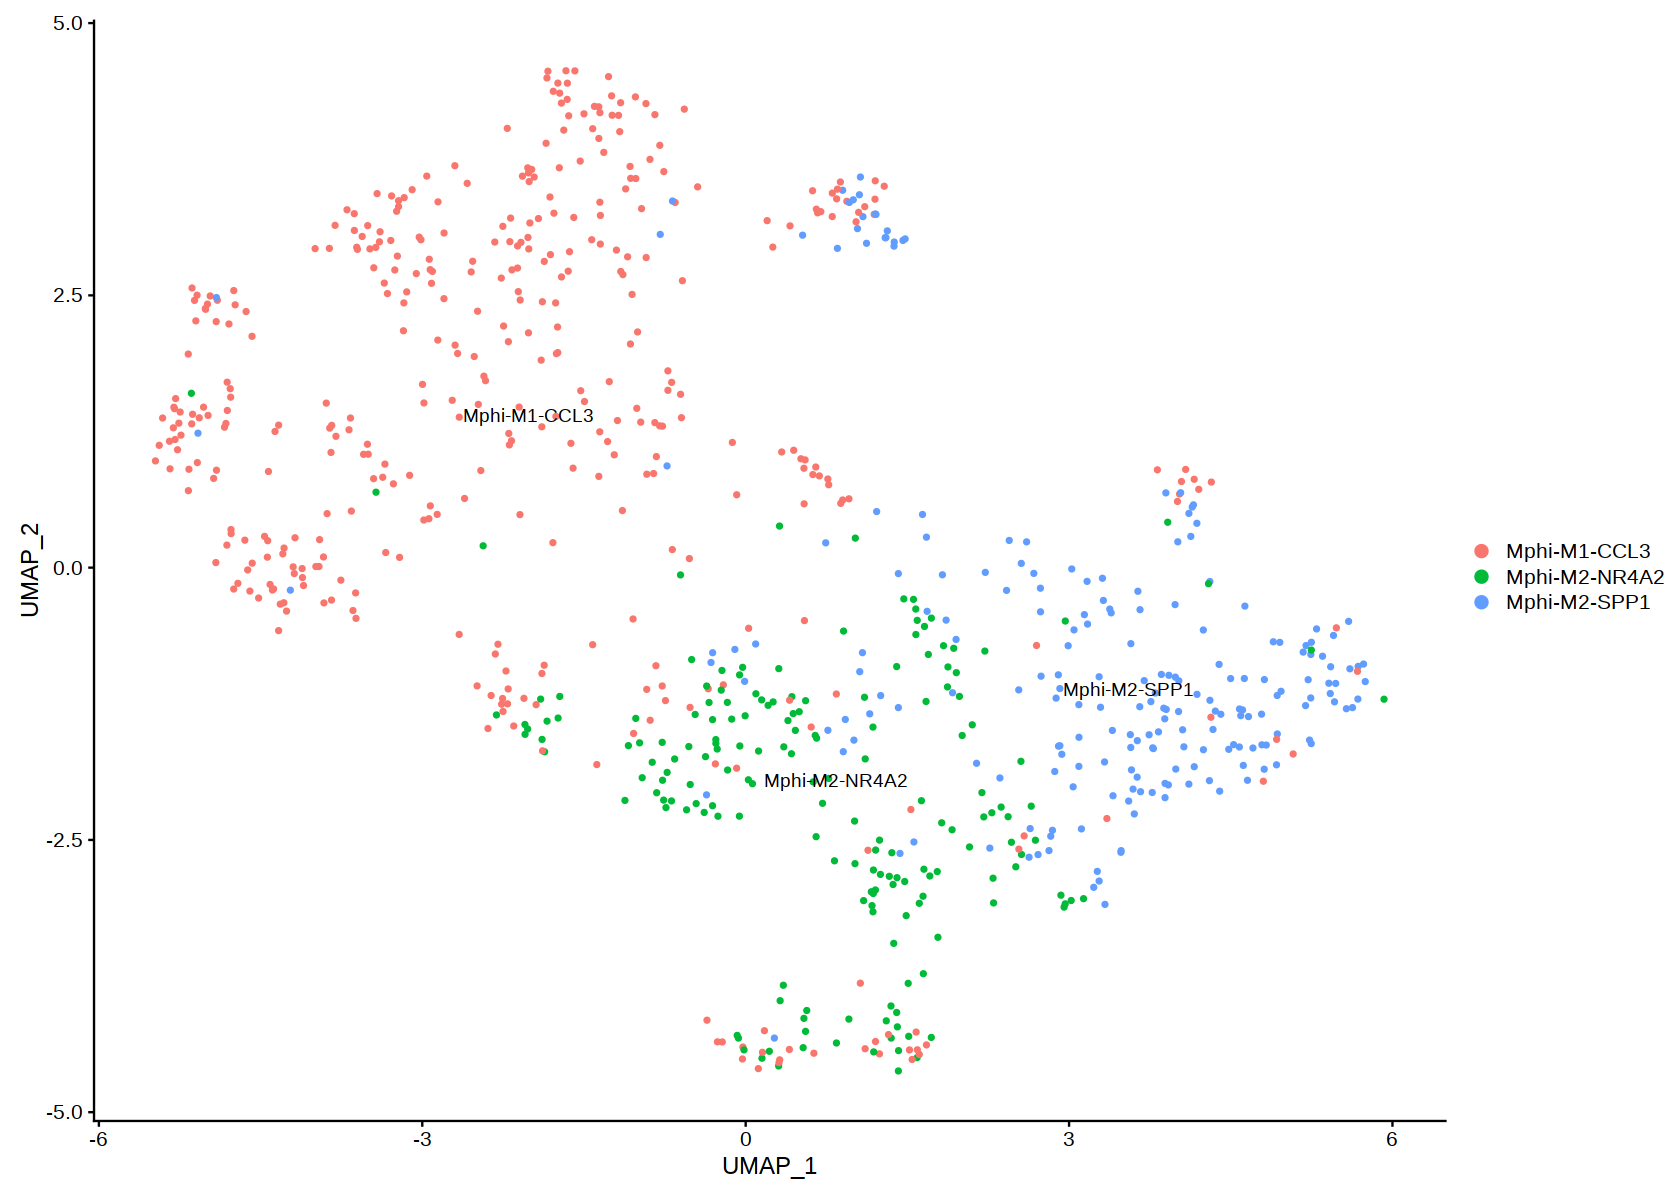

In [130]:
DimPlot(spp1.seu, label = T)

In [103]:
saveRDS(spp1.seu, "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/new_noC03_SPP1_monocytes_SeuratObj.Rds")

## monocle 2

In [115]:
newimport <- function(otherCDS, import_all = FALSE) {
  if(class(otherCDS)[1] == 'Seurat') {
    requireNamespace("Seurat")
    data <- otherCDS@assays$RNA@counts

    if(class(data) == "data.frame") {
      data <- as(as.matrix(data), "sparseMatrix")
    }

    pd <- tryCatch( {
      pd <- new("AnnotatedDataFrame", data = otherCDS@meta.data)
      pd
    },
    #warning = function(w) { },
    error = function(e) {
      pData <- data.frame(cell_id = colnames(data), row.names = colnames(data))
      pd <- new("AnnotatedDataFrame", data = pData)

      message("This Seurat object doesn't provide any meta data");
      pd
    })

    # remove filtered cells from Seurat
    if(length(setdiff(colnames(data), rownames(pd))) > 0) {
      data <- data[, rownames(pd)]
    }

    fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))
    fd <- new("AnnotatedDataFrame", data = fData)
    lowerDetectionLimit <- 0

    if(all(data == floor(data))) {
      expressionFamily <- negbinomial.size()
    } else if(any(data < 0)){
      expressionFamily <- uninormal()
    } else {
      expressionFamily <- tobit()
    }

    valid_data <- data[, row.names(pd)]

    monocle_cds <- newCellDataSet(data,
                                  phenoData = pd,
                                  featureData = fd,
                                  lowerDetectionLimit=lowerDetectionLimit,
                                  expressionFamily=expressionFamily)

    if(import_all) {
      if("Monocle" %in% names(otherCDS@misc)) {
        otherCDS@misc$Monocle@auxClusteringData$seurat <- NULL
        otherCDS@misc$Monocle@auxClusteringData$scran <- NULL

        monocle_cds <- otherCDS@misc$Monocle
        mist_list <- otherCDS

      } else {
        # mist_list <- list(ident = ident)
        mist_list <- otherCDS
      }
    } else {
      mist_list <- list()
    }

    if(1==1) {
      var.genes <- setOrderingFilter(monocle_cds, otherCDS@assays$RNA@var.features)

    }
    monocle_cds@auxClusteringData$seurat <- mist_list

  } else if (class(otherCDS)[1] == 'SCESet') {
    requireNamespace("scater")

    message('Converting the exprs data in log scale back to original scale ...')
    data <- 2^otherCDS@assayData$exprs - otherCDS@logExprsOffset

    fd <- otherCDS@featureData
    pd <- otherCDS@phenoData
    experimentData = otherCDS@experimentData
    if("is.expr" %in% slotNames(otherCDS))
      lowerDetectionLimit <- otherCDS@is.expr
    else
      lowerDetectionLimit <- 1

    if(all(data == floor(data))) {
      expressionFamily <- negbinomial.size()
    } else if(any(data < 0)){
      expressionFamily <- uninormal()
    } else {
      expressionFamily <- tobit()
    }

    if(import_all) {
      # mist_list <- list(iotherCDS@sc3,
      #                   otherCDS@reducedDimension)
      mist_list <- otherCDS

    } else {
      mist_list <- list()
    }

    monocle_cds <- newCellDataSet(data,
                                  phenoData = pd,
                                  featureData = fd,
                                  lowerDetectionLimit=lowerDetectionLimit,
                                  expressionFamily=expressionFamily)
    # monocle_cds@auxClusteringData$sc3 <- otherCDS@sc3
    # monocle_cds@auxOrderingData$scran <- mist_list

    monocle_cds@auxOrderingData$scran <- mist_list

  } else {
    stop('the object type you want to export to is not supported yet')
  }

  return(monocle_cds)
}

In [117]:
cds <- newimport(spp1.seu)
cds <- estimateSizeFactors(cds)
cds <- estimateDispersions(cds)
cds <- detectGenes(cds, min_expr = 0.1)
expressed_genes <- row.names(subset(fData(cds),
    num_cells_expressed >= 10))
pData(cds)$CellType <- pData(cds)$new.immune.ct2
ori.diff_test_res <- differentialGeneTest(cds[expressed_genes,],
              fullModelFormulaStr = "~new.immune.ct2")
ordering_genes <- row.names(subset(ori.diff_test_res, qval < 0.01))
cds <- setOrderingFilter(cds, ordering_genes)

Removing 329 outliers



In [118]:
cds <- reduceDimension(cds, max_components = 2,
                       method = 'DDRTree')

In [119]:
cds <- orderCells(cds)

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(projection) != "matrix") projection <- as.matrix(projection):
“the condition has length > 1 and only the first element will be used”
Warning message in if (class

In [121]:
pData(cds) <- pData(cds) %>% dplyr::select(-sample_name)

In [125]:
saveRDS(spp1.seu@meta.data, file = "/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/SPP1_monocytes_meta.Rds")

In [ ]:
DC12.df <- dif[,c("DC1", "DC2")]
DC12.df$celltype <- cluster.labels.df$celltype[match(rownames(DC12.df), cluster.labels.df$cellname)]

ggplot(DC12.df, aes(x=DC1, y=DC2, color=celltype))+geom_point()

DeSmooth <- predictSmooth(sce, gene = DeGenes, nPoints = 100, tidy = FALSE)

In [108]:
dm <- readRDS("/mnt/data/home/lzz/project/2020-6-18-IVDD_scRNA/results/combin_results/new_results/immune/SPP1_monocytes_destiny_DM.Rds")
dif <- fortify(dm)#转化为data.frame

Loading required package: destiny


Attaching package: ‘destiny’


The following object is masked from ‘package:IRanges’:

    distance




ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not an S4 object with class DiffusionMap.


In [111]:
?fortify

In [1]:
new_M2 <- c("ADOR3", "TGFBR2", "F13A1", "STAB1", "CD163", "MARCO", "IL17RB", "ALOX5AP", "ALOX5AP",
            "IL4R", "IL10", "CD200R1", "ALOX15", "TGM2", "MRC1", "CCL17", "CCL13", "CCL4", "TG",
            "MMP12", "MMP1", "TGFB1", "FN1", "F13A1", "CCL18") %>% unique()

ERROR: Error in c("ADOR3", "TGFBR2", "F13A1", "STAB1", "CD163", "MARCO", "IL17RB", : could not find function "%>%"


# plot some gene expression